In [2]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

In [3]:
mnist = tf.keras.datasets.mnist

(x_train,y_train) , (x_test,y_test) = mnist.load_data()

In [4]:
x_t_14 = np.empty(shape=[0,28])
x_t_6 = np.empty(shape=[0,28])
y_t = np.empty(shape=[0,10])

for i in y_train:
    x=np.zeros(10)
    x[i]=1
    y_t = np.append(y_t, x)

for i in x_train:
    temp = []
    for x in i:
        temp.append(sum(x))
    temp_arg = np.argsort(temp)
    temp2 = np.zeros(28)
    for x in range(len(temp_arg)):
        if temp_arg[x] < 14:
            temp[x] = 1
        else:
            temp[x] = 0
            
        if temp_arg[x] < 6:
            temp2[x] = 1
    x_t_14 = np.append(x_t_14, temp)
    x_t_6 = np.append(x_t_6, temp2)
    
x_t_14 = x_t_14.reshape(60000,28)
x_t_6 = x_t_6.reshape(60000,28)
y_t = y_t.reshape(60000,10)

In [35]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(2500, input_shape=(28,),activation='relu')) 
model.add(tf.keras.layers.Dense(10, activation='softmax')) 
model.load_weights("cp_2500n_sum_14.ckpt")

model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Dense(1500, input_shape=(28,),activation='relu')) 
model2.add(tf.keras.layers.Dense(10, activation='softmax')) 
model2.load_weights("cp_1500n_sum_6.ckpt")

model3 = tf.keras.Sequential()
model3.add(tf.keras.layers.Dense(1500, input_shape=(28,),activation='relu')) 
model3.add(tf.keras.layers.Dense(10, activation='softmax')) 
model3.load_weights("cp_1500n_sum_14.ckpt")

model4 = tf.keras.Sequential()
model4.add(tf.keras.layers.Dense(1500, input_shape=(28,),activation='relu')) 
model4.add(tf.keras.layers.Dense(10, activation='softmax')) 
model4.load_weights("cp_1500n_max_6.ckpt")

model5 = tf.keras.Sequential()
model5.add(tf.keras.layers.Dense(1500, input_shape=(28,),activation='relu')) 
model5.add(tf.keras.layers.Dense(10, activation='softmax')) 
model5.load_weights("cp_1500n_diff_6.ckpt")

In [49]:
y_results = model.predict(x_t_14,verbose=0)
sol = 0
for i in range(len(y_t)):
    if np.argmax(y_results[i]) == y_train[i]:
        sol+=1
print("The Accuracy of 14 0f 28 by sum with 2500 neurons:",round(sol/len(x_t_14)*100),"%")

y_results = model3.predict(x_t_14,verbose=0)
sol = 0
for i in range(len(y_t)):
    if np.argmax(y_results[i]) == y_train[i]:
        sol+=1
print("The Accuracy of 14 0f 28 by sum with 1500 neurons:",round(sol/len(x_t_14)*100),"%")


y_results = model2.predict(x_t_6,verbose=0)
sol = 0
for i in range(len(y_t)):
    if np.argmax(y_results[i]) == y_train[i]:
        sol+=1
print("The Accuracy of 6 0f 28  by sum with 1500 neurons:",round(sol/len(x_t_6)*100),"%")



y_results = model4.predict(x_t_6,verbose=0)
sol = 0
for i in range(len(y_t)):
    if np.argmax(y_results[i]) == y_train[i]:
        sol+=1
print("The Accuracy of 6 0f 28  by max with 1500 neurons:",round(sol/len(x_t_6)*100),"%")

y_results = model5.predict(x_t_6,verbose=0)
sol = 0
for i in range(len(y_t)):
    if np.argmax(y_results[i]) == y_train[i]:
        sol+=1
print("The Accuracy of 6 0f 28 by difference with 1500 neurons:",round(sol/len(x_t_6)*100),"%")

The Accuracy of 14 0f 28 by sum with 2500 neurons: 91 %
The Accuracy of 14 0f 28 by sum with 1500 neurons: 83 %
The Accuracy of 6 0f 28  by sum with 1500 neurons: 44 %
The Accuracy of 6 0f 28  by max with 1500 neurons: 35 %
The Accuracy of 6 0f 28 by difference with 1500 neurons: 36 %


In [40]:
y_te = np.empty(shape=[0,10])
for i in y_test:
    x=np.zeros(10)
    x[i]=1
    y_te = np.append(y_te, x)

x_te_14 = np.empty(shape=[0,28])
x_te_6 = np.empty(shape=[0,28])
for i in x_test:
    temp = []
    for x in i:
        temp.append(sum(x))
    temp_arg = np.argsort(temp)
    temp2 = np.zeros(28)
    for x in range(len(temp_arg)):
        if temp_arg[x] < 14:
            temp[x] = 1
        else:
            temp[x] = 0
        if temp_arg[x] < 6:
            temp2[x] = 1
    x_te_14 = np.append(x_te_14, temp)
    x_te_6 = np.append(x_te_6, temp)

x_te_14 = x_te_14.reshape(len(x_test),28)
x_te_6 = x_te_6.reshape(len(x_test),28)
y_te = y_te.reshape(len(y_test),10)

In [50]:
y_results = model.predict(x_te_14,verbose=0)
sol = 0
for i in range(len(y_te)):
    if np.argmax(y_results[i]) == y_test[i]:
        sol+=1
print("The Accuracy of 14 0f 28 by sum with 2500 neurons:",round(sol/len(x_te_14)*100),"%")

y_results = model3.predict(x_te_14,verbose=0)
sol = 0
for i in range(len(y_te)):
    if np.argmax(y_results[i]) == y_test[i]:
        sol+=1
print("The Accuracy of 14 0f 28 by sum with 1500 neurons:",round(sol/len(x_te_14)*100),"%")


y_results = model2.predict(x_te_6,verbose=0)
sol = 0
for i in range(len(y_te)):
    if np.argmax(y_results[i]) == y_test[i]:
        sol+=1
print("The Accuracy of 6 0f 28  by sum with 1500 neurons:",round(sol/len(x_te_6)*100),"%")


y_results = model4.predict(x_te_6,verbose=0)
sol = 0
for i in range(len(y_te)):
    if np.argmax(y_results[i]) == y_test[i]:
        sol+=1
print("The Accuracy of 6 0f 28  by max with 1500 neurons:",round(sol/len(x_te_6)*100),"%")

y_results = model5.predict(x_te_6,verbose=0)
sol = 0
for i in range(len(y_te)):
    if np.argmax(y_results[i]) == y_test[i]:
        sol+=1
print("The Accuracy of 6 0f 28 by difference with 1500 neurons:",round(sol/len(x_te_6)*100),"%")

The Accuracy of 14 0f 28 by sum with 2500 neurons: 49 %
The Accuracy of 14 0f 28 by sum with 1500 neurons: 50 %
The Accuracy of 6 0f 28  by sum with 1500 neurons: 14 %
The Accuracy of 6 0f 28  by max with 1500 neurons: 10 %
The Accuracy of 6 0f 28 by difference with 1500 neurons: 11 %


For Training Data:
(14 0f 28 by sum with 2500 neurons) Predicted value : 9  Actual value : 4
(6 0f 28 by sum with 1500 neurons)  Predicted value : 9  Actual value : 4
(14 0f 28 by sum with 1500 neurons) Predicted value : 9  Actual value : 4


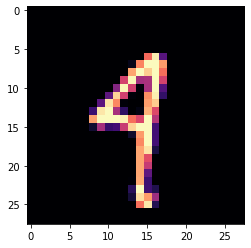

In [48]:
i = np.random.randint(len(x_train))

temp = []
for x in x_train[i]:
    temp.append(sum(x))
    temp_arg = np.argsort(temp)
    temp2 = np.zeros(28)
for x in range(len(temp_arg)):
    if temp_arg[x] < 14:
            temp[x] = 1
    else:
            temp[x] = 0
            
    if temp_arg[x] < 6:
            temp2[x] = 1

result = model.predict(np.array([temp], dtype=np.float32), verbose=0)
result2 = model2.predict(np.array([temp2], dtype=np.float32), verbose=0)
result3 = model3.predict(np.array([temp], dtype=np.float32), verbose=0)
print("For Training Data:")
print("(14 0f 28 by sum with 2500 neurons) Predicted value :",np.argmax(result)," Actual value :",y_train[i])
print("(6 0f 28 by sum with 1500 neurons)  Predicted value :",np.argmax(result2)," Actual value :",y_train[i])
print("(14 0f 28 by sum with 1500 neurons) Predicted value :",np.argmax(result3)," Actual value :",y_train[i])

plt.imshow(x_train[i], cmap = 'magma')
plt.show()

For Testing Data:
(14 0f 28 by sum with 2500 neurons) Predicted value : 1  Actual value : 4
(6 0f 28 by sum with 1500 neurons)  Predicted value : 2  Actual value : 4
(14 0f 28 by sum with 1500 neurons) Predicted value : 1  Actual value : 4


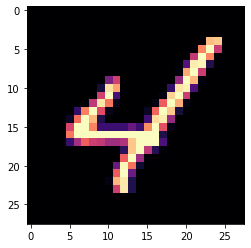

In [45]:
i = np.random.randint(len(x_test))

temp = []
for x in x_test[i]:
    temp.append(sum(x))
    temp_arg = np.argsort(temp)
    temp2 = np.zeros(28)
for x in range(len(temp_arg)):
    if temp_arg[x] < 14:
            temp[x] = 1
    else:
            temp[x] = 0
            
    if temp_arg[x] < 6:
            temp2[x] = 1

result = model.predict(np.array([temp], dtype=np.float32), verbose=0)
result2 = model2.predict(np.array([temp2], dtype=np.float32), verbose=0)
result3 = model3.predict(np.array([temp], dtype=np.float32), verbose=0)
print("For Testing Data:")
print("(14 0f 28 by sum with 2500 neurons) Predicted value :",np.argmax(result)," Actual value :",y_test[i])
print("(6 0f 28 by sum with 1500 neurons)  Predicted value :",np.argmax(result2)," Actual value :",y_test[i])
print("(14 0f 28 by sum with 1500 neurons) Predicted value :",np.argmax(result3)," Actual value :",y_test[i])

plt.imshow(x_test[i], cmap = 'magma')
plt.show()

In [5]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(100, input_shape=(28,),activation='relu',trainable=False))
model.add(tf.keras.layers.Dense(10, activation='softmax')) 
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
p_x = []
p_y = []
for i in range(100):
    j = (i+1) * 10
    x = x_t_14[:j]
    y = y_t[:j]
    model.fit(x, y, epochs=1, batch_size=10, verbose=0)
    y_results = model.predict(x_t_14,verbose=0)
    sol = 0
    for k in range(j):
        if np.argmax(y_results[k]) == y_train[k]:
            sol+=1
            continue
        y_results[k][np.argmax(y_results[k])] = 0
        if np.argmax(y_results[k]) == y_train[k]:
            sol+=1
            continue
        y_results[k][np.argmax(y_results[k])] = 0
        if np.argmax(y_results[k]) == y_train[k]:
            sol+=1
            continue
            
    print("The Accuracy of 14 0f 28 by sum with 100 neurons trained on",j," samples :",round((sol/j)*100),"%")
    p_y.append(round((sol/j)*100))
    p_x.append(j)

The Accuracy of 14 0f 28 by sum with 100 neurons trained on 10  samples : 100 %
The Accuracy of 14 0f 28 by sum with 100 neurons trained on 20  samples : 100 %
The Accuracy of 14 0f 28 by sum with 100 neurons trained on 30  samples : 100 %
The Accuracy of 14 0f 28 by sum with 100 neurons trained on 40  samples : 100 %
The Accuracy of 14 0f 28 by sum with 100 neurons trained on 50  samples : 100 %
The Accuracy of 14 0f 28 by sum with 100 neurons trained on 60  samples : 100 %
The Accuracy of 14 0f 28 by sum with 100 neurons trained on 70  samples : 100 %
The Accuracy of 14 0f 28 by sum with 100 neurons trained on 80  samples : 100 %
The Accuracy of 14 0f 28 by sum with 100 neurons trained on 90  samples : 100 %
The Accuracy of 14 0f 28 by sum with 100 neurons trained on 100  samples : 100 %
The Accuracy of 14 0f 28 by sum with 100 neurons trained on 110  samples : 100 %
The Accuracy of 14 0f 28 by sum with 100 neurons trained on 120  samples : 100 %
The Accuracy of 14 0f 28 by sum with 

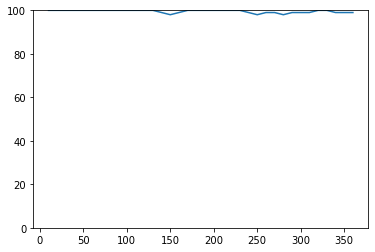

In [13]:
ax = plt.gca()
ax.set_ylim([0, 100])
plt.plot(p_x,p_y)